#Writeup
Yuqian Gong

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
df = pd.read_csv("gss2012.csv")

During exploring the data, I am especially interested in the income distribution among
subgroups of the respondents and how respondents with different income levels hold different attitudes and views. 
First, the income information for individual respondent and respondents’ families are provided within 
a certain range and are in the format of strings, so I need to approximate their true incomes and convert
the data into floats. The approach I take is to take the mean of an income range or take the minimum of an
interval which is open on the right or the maximum of an interval that is open on the left. The code is shown below:


In [145]:
def get_income_mean(x):
    z = []
    if type(x) != float:
        m = x.split(" ")
        for v in m:
            q = v.strip("$")
            if q.isdigit():
                z.append(float(q))
    else:
        z.append(float(x))

    return sum(z)/len(z)
df["resp_income"] = df["rincom06"].apply(get_income_mean)
df["family_income"] = df["income06"].apply(get_income_mean)

1. General histograms 

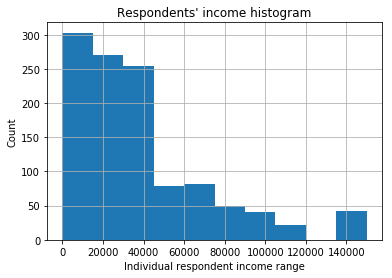

In [159]:

plt = pd.DataFrame.hist(df, column = ["resp_income"] )
plt[0][0].set_xlabel("Individual respondent income range")
plt[0][0].set_ylabel("Count")
plt[0][0].set_title("Respondents' income histogram")

#plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'set'

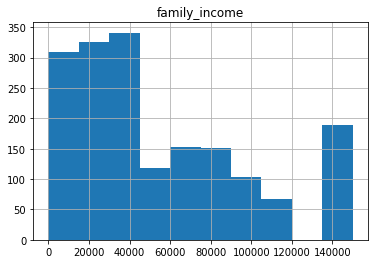

In [163]:
b = pd.DataFrame.hist(df, column = ["family_income"])
b.set(xlabel = "Respondents' family income range", ylabel = "Count",title = "Respondents'family income histogram")

From the income histrogram for individual respondents and their families, we can tell are the income level 
for individuals are more skwed to the left and the majority of respondents have income level only lower 
than 50000 dollars. The situation is better for respondents' family income and they have more samples centered
in the middle of the histogram. Respondents who have higher than 140000 dollars are outliers in this case. 

2. Income patterns among subgroups 

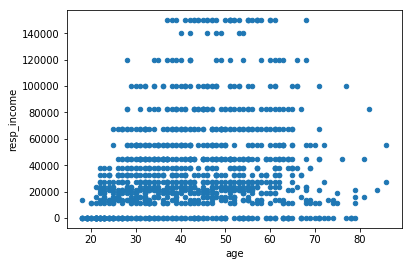

In [125]:
ax = df.plot.scatter(x = "age", y = "resp_income")
plt.xlabel = ("Age")
plt.ylabel = ("Individual respondent Income per year")
plt.title = ("Individual income scatter plot among different ages")
plt.show()

From the scattor plot of individual incomes among different ages, we can see that the richest people are usually 
between 30 to 60 years old and their income can be as high as more than 140000 dollars per year. There are one (or multiple) outliers at 70. For respondents between 20 to 30 years old, most of their incomes are below 60000 dollars. 

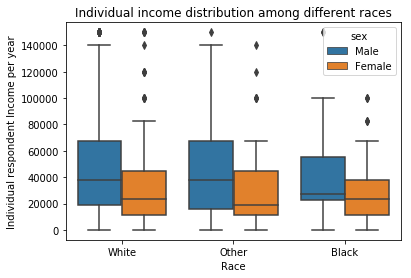

In [165]:
race_income = sns.boxplot(x = "race", y = "resp_income", hue = "sex", data = df, )
race_income.set(xlabel = "Race", ylabel = "Individual respondent Income per year",title = "Individual income distribution among different races")


From the above boxplot, we can easily see that most white people have higher income than most black people
or other races. The 75 percentile can be as high as around 70000 dollars for white people while the 75 percentile
is only less than 60000 dollars for black people. Besides, most women have much less income than men regardless of races. 
The income gap between two genders is most significant among white people and smallest among black people. All race 
and gender subgroups have some outliers in income distribution.

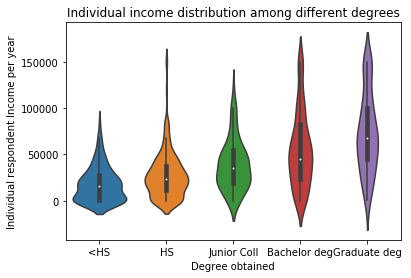

In [161]:
degree_order = ["<HS","HS","Junior Coll", "Bachelor deg","Graduate deg"]
ax = sns.violinplot(x = "degree", y = "resp_income", data = df, order = degree_order)
ax.set(xlabel = ("Degree obtained"), ylabel = ("Individual respondent Income per year"),\
       title = ("Individual income distribution among different degrees"))


From the above graph, we can tell that subgroups with higher degree level will have wider range of income
and the mean or median is larger. While for groups with low degrees, their income tend to be distributed
in a lower range. 

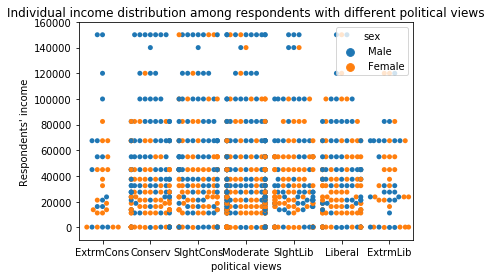

In [167]:
polview_order = ["ExtrmCons", "Conserv","SlghtCons", "Moderate", "SlghtLib", "Liberal", "ExtrmLib"]
a = sns.swarmplot(x = "polviews", y = "resp_income", hue = "sex", data = df, order =  polview_order)
a.set(xlabel = "political views", ylabel = "Respondents' income",\
      title = "Individual income distribution among respondents with different political views")


From the swarmplot showing the income distribution among respondents with different political views, 
we can see that the average income of extreme conservatives and extreme liberals is lower compared
with the incomes of groups with other political views. It seems also that conservatives and moderate 
respondents have more outliers in high income range. Generally, in each subgroup, women still have 
less average income compared with men. 

3. Different attitudes or beliefs among different income groups

In [129]:
def importance_to_num(x):
    if x == 'MOST IMPORTANT':
        return 1
    elif x == '2ND IMPORTANT':
        return 2
    elif x == '3RD IMPORTANT':
        return 3
    elif x == '4TH IMPORTANT':
        return 4
    elif x == 'LEAST IMPORTANT':
        return 5
fig = plt.figure()
edu_q = ["obey", "popular", "thnkself","workhard","helpoth"]
edu_q_new =  ["obeynew", "popularnew", "thnkselfnew","workhardnew","helpothnew"]
l = []
name = []
for v in edu_q:
    df[v+"new"] = df[v].apply(importance_to_num)
    b = df.groupby([v + "new"]).size()
    l.append(b)
    name.append(v+"new")
df3 = pd.concat(l, axis = 1, names = ["importance"])
df3.columns = name

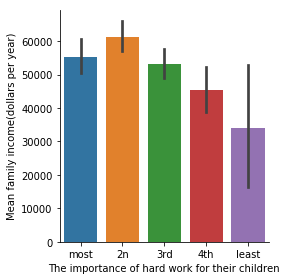

In [130]:
work_income = sns.factorplot(x = "workhardnew", y = "family_income",data = df, kind = "bar")
(work_income.set_axis_labels("The importance of hard work for their children","Mean family income(dollars per year)")
            .set_xticklabels(["most", "2n", "3rd", "4th","least"]))

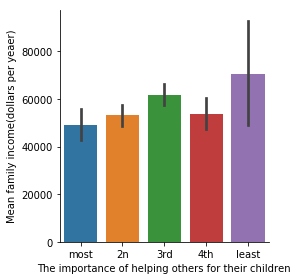

In [131]:
help_income = sns.factorplot(x = "helpothnew", y = "family_income",data = df, kind = "bar")
(help_income.set_axis_labels("The importance of helping others for their children", "Mean family income(dollars per yeaer)")
            .set_xticklabels(["most", "2n", "3rd", "4th", "least"]))

The above two bar charts reveal interesting patterns in income distritbution when respondents are asked questions related to their values in family education. Generally speaking, high-income family tend to rate "working hard" as 
an important aspect in educating their children. Besides, they didn't seem care about the importance of "helping others" compared with relatively low-income families from the chart.

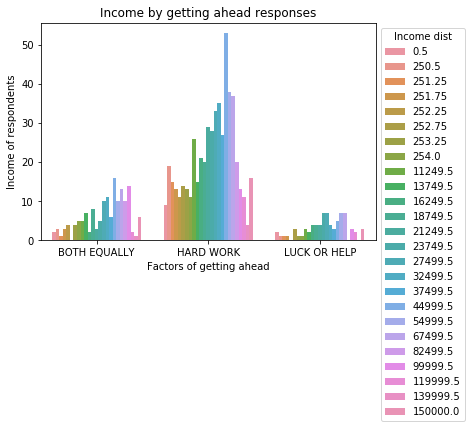

In [169]:
c= sns.countplot(x = "getahead", hue = "resp_income", data = df)
c.set(xlabel = "Factors of getting ahead", ylabel = "Income of respondents", title = "Income by getting ahead responses")
c.legend(title = "Income dist", bbox_to_anchor = (1, 1))

Among respondents who believe that people get ahead by hardworking, the middle income respondents
are the major proportion. The outlier income group is 45000 dollars. Besides, we are not able to 
see any other interesting patterns in the graph. 

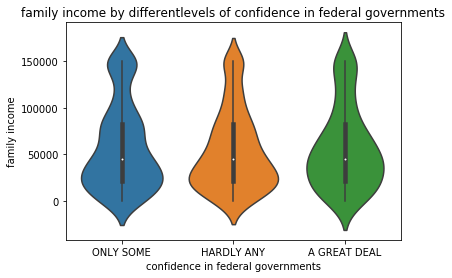

In [170]:
d = sns.violinplot(x = "confed", y = "family_income", data = df)
d.set(xlabel = "confidence in federal governments", ylabel = "family income", title = "family income by different\
levels of confidence in federal governments")

Then we are interested in examing which income group have more confidence in the federal governments.
Interestingly, from the violin graph, for those who hardly have any confidence in the federal governments, 
we can see that lower income groups with less than 50000 dollars take a large proportion. However, for those
who have a great deal confidence, their average income level tends to be kind of higher than those 
who hardly have any and those who only have some. 